In [2]:
import numpy as np
import pandas as pd
import json
import os

In [3]:
def select_run_folder(base_dir, run_number):
    selected_folder_path = os.path.join(base_dir, str(run_number))
    if os.path.isdir(selected_folder_path):
        return selected_folder_path
    else:
        print("No run found for provided number")

In [4]:
base_directory = "./Data_collect"

## Data loading functions

In [5]:
def load_gpu_info_parameters(folder_path, filename='gpu_info.json'):
    json_file_path = os.path.join(folder_path, filename)

    # Load the run parameters from the JSON file
    with open(json_file_path, 'r') as json_file:
        gpu_parameters = json.load(json_file)
        return gpu_parameters
    
def load_profiling_parameters(folder_path,N,theta,dt):
    profiling_filename = f"profiling_{N}_{theta}_{dt}.json"
    json_file_path = os.path.join(folder_path,profiling_filename)
    
    with open(json_file_path, 'r') as json_file:
        profile_parameters = json.load(json_file)
        # Extract units and data
        units = profile_parameters['units']
        data = profile_parameters['data']

        # Convert data back to a DataFrame
        df = pd.DataFrame(data)
        
        return df

    # profile_paths = sorted([os.path.join(json_file_path, file) for file in os.listdir(json_file_path) 
    #                 if file not in ['runs.json','gpu_info.json']], reverse=False)

    # for profile_path in profile_paths:
    #     with open(profile_path, 'r') as json_file:
    #         profile_parameters = json.load(json_file)
    #         # Extract units and data
    #         units = profile_parameters['units']
    #         data = profile_parameters['data']

    #         # Convert data back to a DataFrame
    #         df = pd.DataFrame(data)
            
    #         return df

            # # Insert units as the first row
            # df = pd.concat([pd.DataFrame([units]), df], ignore_index=True)

            # Display the resulting DataFrame

            # Initialize an empty dictionary to collect renamed columns for each row
            
def load_profiling_parameters_ncu(folder_path,N,theta,dt):
    profiling_filename = f"profiling_{N}_{theta}_{dt}.json"
    json_file_path = os.path.join(folder_path,profiling_filename)
    
    with open(json_file_path, 'r') as json_file:
            profile_parameters = json.load(json_file)
            # Extract units and data
            units = profile_parameters['units']
            data = profile_parameters['data']

            # Convert data back to a DataFrame
            df = pd.DataFrame(data)
            df['Metric Value'] = pd.to_numeric(df['Metric Value'].str.replace(',', ''), errors='coerce')

            # Define columns to group by
            group_columns = ['ID', 'Process ID', 'Process Name', 'Host Name', 'Kernel Name', 
                            'Context', 'Stream', 'Block Size', 'Grid Size', 'Device', 'CC', 'Section Name']

            # Pivot the DataFrame to aggregate by the specified columns, with Metric Name as new columns
            df_pivot = df.pivot_table(
                index=group_columns,
                columns='Metric Name',
                values='Metric Value',
                aggfunc='first'  # Use 'first' since each group should have unique Metric Values
            ).reset_index()

            # Flatten multi-level columns if necessary (e.g., after pivot)
            df_pivot.columns.name = None  # Remove the column group name
            df_pivot.columns = [col if not isinstance(col, tuple) else col[1] for col in df_pivot.columns]
            
            return df_pivot
    
    # with open(json_file_path, 'r') as json_file:
    #     profile_parameters = json.load(json_file)
    #     # Extract units and data
    #     units = profile_parameters['units']
    #     data = profile_parameters['data']

    #     # Convert data back to a DataFrame
    #     df = pd.DataFrame(data)
        
    #     return df

    # json_file_path = os.path.join(folder_path)

    # profile_paths = sorted([os.path.join(json_file_path, file) for file in os.listdir(json_file_path) 
    #                 if file not in ['runs.json','gpu_info.json']], reverse=False)

    # for profile_path in profile_paths:
    #     with open(profile_path, 'r') as json_file:
    #         profile_parameters = json.load(json_file)
    #         # Extract units and data
    #         units = profile_parameters['units']
    #         data = profile_parameters['data']

    #         # Convert data back to a DataFrame
    #         df = pd.DataFrame(data)
    #         df['Metric Value'] = pd.to_numeric(df['Metric Value'].str.replace(',', ''), errors='coerce')

    #         # Define columns to group by
    #         group_columns = ['ID', 'Process ID', 'Process Name', 'Host Name', 'Kernel Name', 
    #                         'Context', 'Stream', 'Block Size', 'Grid Size', 'Device', 'CC', 'Section Name']

    #         # Pivot the DataFrame to aggregate by the specified columns, with Metric Name as new columns
    #         df_pivot = df.pivot_table(
    #             index=group_columns,
    #             columns='Metric Name',
    #             values='Metric Value',
    #             aggfunc='first'  # Use 'first' since each group should have unique Metric Values
    #         ).reset_index()

    #         # Flatten multi-level columns if necessary (e.g., after pivot)
    #         df_pivot.columns.name = None  # Remove the column group name
    #         df_pivot.columns = [col if not isinstance(col, tuple) else col[1] for col in df_pivot.columns]
            
    #         return df_pivot

def base_filter(prof_df):    
    filter_out = [
        "Device",
        "Context",
        "Stream",
        "Correlation_ID",
        "tex0_cache_sector_queries",
        "tex1_cache_sector_queries",
        "tex0_cache_sector_misses",
        "tex1_cache_sector_misses",
        "l2_subp0_write_sector_misses",
        "l2_subp1_write_sector_misses",
        "l2_subp0_read_sysmem_sector_queries",
        "l2_subp1_read_sysmem_sector_queries",
        "gld_inst_8bit",
        "gld_inst_16bit",
        "gld_inst_32bit",
        "gld_inst_64bit",
        "gld_inst_128bit",
        "gst_inst_8bit",
        "gst_inst_16bit",
        "gst_inst_32bit",
        "gst_inst_64bit",
        "gst_inst_128bit",
        "prof_trigger_00",
        "prof_trigger_01",
        "prof_trigger_02",
        "prof_trigger_03",
        "prof_trigger_04",
        "prof_trigger_05",
        "prof_trigger_06",
        "prof_trigger_07",
        "inst_issued2",
        "generic_load",
        "generic_store",
        "inst_executed_in_trap",
        "active_cycles_in_trap",
        "inst_executed_shared_atom_cas",
        "shared_atom",
        "global_atom_cas",
        "gred_count",
        "divergent_branch",
        "branch",
        "shared_ld_bank_conflict",
        "shared_st_bank_conflict",
        "inst_replay_overhead",
        "shared_load_transactions_per_request",
        "shared_store_transactions_per_request",
        "local_hit_rate",
        "gld_requested_throughput",
        "gst_requested_throughput",
        "local_memory_overhead",
        "tex_cache_throughput",
        "sysmem_utilization",
        "stall_sync",
        "stall_texture",
        "shared_efficiency",
        "cf_issued",
        "ldst_issued",
        "ldst_executed",
        "atomic_transactions_per_request",
        "flop_count_hp",
        "flop_count_hp_add",
        "flop_count_hp_mul",
        "flop_count_hp_fma",
        "inst_fp_16",
        "sysmem_read_utilization",
        "sysmem_write_utilization",
        "pcie_total_data_transmitted",
        "pcie_total_data_received",
        "inst_executed_surface_loads",
        "inst_executed_surface_stores",
        "inst_executed_global_atomics",
        "inst_executed_global_reductions",
        "inst_executed_surface_atomics",
        "inst_executed_surface_reductions",
        "inst_executed_shared_atomics",
        "inst_executed_tex_ops",
        "l2_surface_load_bytes",
        "l2_global_reduction_bytes",
        "l2_surface_store_bytes",
        "l2_surface_reduction_bytes",
        "l2_surface_atomic_store_bytes",
        "surface_load_requests",
        "surface_store_requests",
        "global_reduction_requests",
        "surface_atomic_requests",
        "surface_reduction_requests",
        "sysmem_read_bytes",
        "sysmem_write_bytes",
        "texture_load_requests",
        "unique_warps_launched",
        "tex_utilization",
        "l2_utilization",
        "shared_utilization",
        "ldst_fu_utilization",
        "cf_fu_utilization",
        "special_fu_utilization",
        "tex_fu_utilization",
        "single_precision_fu_utilization",
        "double_precision_fu_utilization",
        "dram_utilization",
        "half_precision_fu_utilization",
        "ecc_transactions",
        "ecc_throughput"
        ]
    return prof_df.drop(filter_out, axis=1, errors='ignore')

def ncu_2_nvprof(df):
    nv = {}
    nv["Device"] = "NVIDIA GeForce RTX 3070 8GB (0)"
    nv["Context"] = df['Context']
    nv["Stream"] = df['Stream']
    nv["Kernel"] = df['Kernel Name']
    nv["Correlation_ID"] = ""
    nv["tex0_cache_sector_queries"] = ""
    nv["tex1_cache_sector_queries"] = ""
    nv["tex0_cache_sector_misses"] = ""
    nv["tex1_cache_sector_misses"] = ""
    nv["fb_subp0_read_sectors"] = df['dram__sectors_read.sum']
    nv["fb_subp1_read_sectors"] = df['dram__sectors_read.sum']
    nv['fb_subp0_write_sectors'] = df['dram__sectors_write.sum']
    nv['fb_subp1_write_sectors'] = df['dram__sectors_write.sum']
    nv['l2_subp0_write_sector_misses'] = df['lts__t_sectors_op_write_lookup_miss.sum']
    nv['l2_subp1_write_sector_misses'] = df['lts__t_sectors_op_write_lookup_miss.sum']
    nv['l2_subp0_read_sector_misses'] = df['lts__t_sectors_op_read_lookup_miss.sum']
    nv['l2_subp1_read_sector_misses'] = df['lts__t_sectors_op_read_lookup_miss.sum']
    nv['l2_subp0_read_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['l2_subp1_read_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['l2_subp0_write_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['l2_subp1_write_tex_sector_queries'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['l2_subp0_read_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_read_lookup_hit.sum']
    nv['l2_subp1_read_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_read_lookup_hit.sum']
    nv['l2_subp0_write_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_write_lookup_hit.sum']
    nv['l2_subp1_write_tex_hit_sectors'] = df['lts__t_sectors_srcunit_tex_op_write_lookup_hit.sum']
    nv['l2_subp0_total_read_sector_queries'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp1_total_read_sector_queries'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp0_total_write_sector_queries'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp1_total_write_sector_queries'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_subp0_read_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['l2_subp1_read_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['l2_subp0_write_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['l2_subp1_write_sysmem_sector_queries'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['elapsed_cycles_sm'] = df['sm__cycles_elapsed.sum']
    nv['gld_inst_8bit'] = ''
    nv['gld_inst_16bit'] = ''
    nv['gld_inst_32bit'] = ''
    nv['gld_inst_64bit'] = ''
    nv['gld_inst_128bit'] = ''
    nv['gst_inst_8bit'] = ''
    nv['gst_inst_16bit'] = ''
    nv['gst_inst_32bit'] = ''
    nv['gst_inst_64bit'] = ''
    nv['gst_inst_128bit'] = ''
    nv['prof_trigger_00'] = ''
    nv['prof_trigger_01'] = ''
    nv['prof_trigger_02'] = ''
    nv['prof_trigger_03'] = ''
    nv['prof_trigger_04'] = ''
    nv['prof_trigger_05'] = ''
    nv['prof_trigger_06'] = ''
    nv['prof_trigger_07'] = ''
    nv['warps_launched'] = df['smsp__warps_launched.sum']
    nv['inst_issued0'] = df['smsp__issue_inst0.sum']
    nv['inst_issued1'] = df['sm__inst_issued.sum']
    nv['inst_issued2'] = ''
    nv['inst_executed'] = df['sm__inst_executed.sum']
    nv['thread_inst_executed'] = df['smsp__thread_inst_executed.sum']
    nv['not_predicated_off_thread_inst_executed'] = df['smsp__thread_inst_executed_pred_on.sum']
    nv['active_cycles'] = df['sm__cycles_active.sum']
    nv['active_warps'] = df['sm__warps_active.sum']
    nv['global_load'] = df['smsp__inst_executed_op_global_ld.sum']
    nv['global_store'] = df['smsp__inst_executed_op_global_st.sum']
    nv['generic_load'] = df['smsp__inst_executed_op_generic_ld.sum']
    nv['generic_store'] = df['smsp__inst_executed_op_generic_st.sum']
    nv['inst_executed_in_trap'] = ''
    nv['active_cycles_in_trap'] = ''
    nv['local_store'] = df['smsp__inst_executed_op_local_st.sum']
    nv['local_load'] = df['smsp__inst_executed_op_local_ld.sum']
    nv['shared_load'] = df['smsp__inst_executed_op_shared_ld.sum']
    nv['shared_store'] = df['smsp__inst_executed_op_shared_st.sum']
    nv['inst_executed_shared_atom_cas'] = ''
    nv['shared_atom'] = df['smsp__inst_executed_op_shared_atom.sum']
    nv['global_atom_cas'] = df['smsp__inst_executed_op_generic_atom_dot_cas.sum']
    nv['atom_count'] = df['smsp__inst_executed_op_generic_atom_dot_alu.sum']
    nv['gred_count'] = df['smsp__inst_executed_op_global_red.sum']
    nv['divergent_branch'] = ''
    nv['branch'] = ''
    nv['shared_ld_bank_conflict'] = df['l1tex__data_bank_conflicts_pipe_lsu_mem_shared_op_ld.sum']
    nv['shared_st_bank_conflict'] = df['l1tex__data_bank_conflicts_pipe_lsu_mem_shared_op_st.sum']
    nv['shared_ld_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum']
    nv['shared_st_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum']
    nv['active_cycles_pm'] = df['sm__cycles_active.sum']
    nv['active_warps_pm'] = df['sm__warps_active.sum']
    nv['elapsed_cycles_pm'] = df['sm__cycles_elapsed.sum']
    nv['inst_per_warp'] = df['smsp__average_inst_executed_per_warp.ratio']
    nv['branch_efficiency'] = df['smsp__sass_average_branch_targets_threads_uniform.pct']
    nv['warp_execution_efficiency'] = df['smsp__thread_inst_executed_per_inst_executed.ratio']
    nv['warp_nonpred_execution_efficiency'] = df['smsp__thread_inst_executed_per_inst_executed.pct']
    nv['inst_replay_overhead'] = ''
    nv['shared_load_transactions_per_request'] = ''
    nv['shared_store_transactions_per_request'] = ''
    nv['local_load_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_local_op_ld.ratio']
    nv['local_store_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_local_op_st.ratio']
    nv['gld_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_global_op_ld.ratio']
    nv['gst_transactions_per_request'] = df['l1tex__average_t_sectors_per_request_pipe_lsu_mem_global_op_st.ratio']
    nv['shared_store_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum']
    nv['shared_load_transactions'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum']
    nv['local_load_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_ld.sum']
    nv['local_store_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_st.sum']
    nv['gld_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld.sum']
    nv['gst_transactions'] = df['l1tex__t_sectors_pipe_lsu_mem_global_op_st.sum']
    nv['sysmem_read_transactions'] = df['lts__t_sectors_aperture_sysmem_op_read.sum']
    nv['sysmem_write_transactions'] = df['lts__t_sectors_aperture_sysmem_op_write.sum']
    nv['l2_read_transactions'] = df['lts__t_sectors_op_read.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['l2_write_transactions'] = df['lts__t_sectors_op_write.sum'] + df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum']
    nv['global_hit_rate'] = (df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_st_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red_lookup_hit.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom_lookup_hit.sum']) / (df['l1tex__t_sectors_pipe_lsu_mem_global_op_ld.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_st.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom.sum'])
    nv['local_hit_rate'] = ''
    nv['gld_requested_throughput'] = ''
    nv['gst_requested_throughput'] = ''
    nv['gld_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_global_op_ld.sum.per_second']
    nv['gst_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_global_op_st.sum.per_second']
    nv['local_memory_overhead'] = ''
    nv['tex_cache_hit_rate'] = df['l1tex__t_sector_hit_rate.pct']
    nv['l2_tex_read_hit_rate'] = df['lts__t_sector_op_read_hit_rate.pct']
    nv['l2_tex_write_hit_rate'] = df['lts__t_sector_op_write_hit_rate.pct']
    nv['tex_cache_throughput'] = ''
    nv['l2_tex_read_throughput'] = df['lts__t_sectors_srcunit_tex_op_read.sum.per_second']
    nv['l2_tex_write_throughput'] = df['lts__t_sectors_srcunit_tex_op_write.sum.per_second']
    nv['l2_read_throughput'] = df['lts__t_sectors_op_read.sum.per_second'] + df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second']
    nv['l2_write_throughput'] = df['lts__t_sectors_op_write.sum.per_second'] + df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second']
    nv['sysmem_read_throughput'] = df['lts__t_sectors_aperture_sysmem_op_read.sum.per_second']
    nv['sysmem_write_throughput'] = df['lts__t_sectors_aperture_sysmem_op_write.sum.per_second']
    nv['local_load_throughput'] = df['l1tex__t_bytes_pipe_lsu_mem_local_op_ld.sum.per_second']
    nv['local_store_throughput'] = df['l1tex__t_sectors_pipe_lsu_mem_local_op_st.sum.per_second']
    nv['shared_load_throughput'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_ld.sum.per_second']
    nv['shared_store_throughput'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared_op_st.sum.per_second']
    nv['gld_efficiency'] = df['smsp__sass_average_data_bytes_per_sector_mem_global_op_ld.pct']
    nv['gst_efficiency'] = df['smsp__sass_average_data_bytes_per_sector_mem_global_op_st.pct']
    nv['tex_cache_transactions'] = df['l1tex__lsu_writeback_active.avg.pct_of_peak_sustained_active'] + df['l1tex__tex_writeback_active.avg.pct_of_peak_sustained_active']
    nv['flop_count_dp'] = df['smsp__sass_thread_inst_executed_op_dadd_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_dmul_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_dfma_pred_on.sum'] * 2
    nv['flop_count_dp_add'] = df['smsp__sass_thread_inst_executed_op_dadd_pred_on.sum']
    nv['flop_count_dp_fma'] = df['smsp__sass_thread_inst_executed_op_dfma_pred_on.sum']
    nv['flop_count_dp_mul'] = df['smsp__sass_thread_inst_executed_op_dmul_pred_on.sum']
    nv['inst_issued'] = df['smsp__inst_issued.sum']
    nv['sysmem_utilization'] = ''
    nv['stall_inst_fetch'] = df['smsp__warp_issue_stalled_no_instruction_per_warp_active.pct']
    nv['stall_exec_dependency'] = df['smsp__warp_issue_stalled_short_scoreboard_per_warp_active.pct'] + df['smsp__warp_issue_stalled_wait_per_warp_active.pct'] 
    nv['stall_memory_dependency'] = df['smsp__warp_issue_stalled_long_scoreboard_per_warp_active.pct']
    nv['stall_texture'] = df['smsp__warp_issue_stalled_tex_throttle_per_warp_active.pct']
    nv['stall_sync'] = df['smsp__warp_issue_stalled_barrier_per_warp_active.pct'] + df['smsp__warp_issue_stalled_membar_per_warp_active.pct']
    nv['stall_other'] = df['smsp__warp_issue_stalled_dispatch_stall_per_warp_active.pct'] + df['smsp__warp_issue_stalled_misc_per_warp_active.pct']
    nv['stall_constant_memory_dependency'] = df['smsp__warp_issue_stalled_imc_miss_per_warp_active.pct']
    nv['stall_pipe_busy'] = df['smsp__warp_issue_stalled_math_pipe_throttle_per_warp_active.pct'] + df['smsp__warp_issue_stalled_mio_throttle_per_warp_active.pct']
    nv['shared_efficiency'] = ''
    nv['inst_fp_64'] = df['smsp__sass_thread_inst_executed_op_fp64_pred_on.sum']
    nv['inst_bit_convert'] = df['smsp__sass_thread_inst_executed_op_conversion_pred_on.sum']
    nv['inst_control'] = df['smsp__sass_thread_inst_executed_op_control_pred_on.sum']
    nv['inst_compute_ld_st'] = df['smsp__sass_thread_inst_executed_op_memory_pred_on.sum']
    nv['inst_misc'] = df['smsp__sass_thread_inst_executed_op_misc_pred_on.sum']
    nv['issue_slots'] = df['smsp__inst_issued.sum']
    nv['cf_issued'] = ''
    nv['cf_executed'] = df['smsp__inst_executed_pipe_cbu.sum'] + df['smsp__inst_executed_pipe_adu.sum']
    nv['ldst_issued'] = ''
    nv['ldst_executed'] = ''
    nv['atomic_transactions'] = df['l1tex__t_set_accesses_pipe_lsu_mem_global_op_atom.sum']  + df['l1tex__t_set_accesses_pipe_lsu_mem_global_op_red.sum']
    nv['atomic_transactions_per_request'] = (df['l1tex__t_sectors_pipe_lsu_mem_global_op_atom.sum'] + df['l1tex__t_sectors_pipe_lsu_mem_global_op_red.sum']) / (df['l1tex__t_requests_pipe_lsu_mem_global_op_atom.sum'] + df['l1tex__t_requests_pipe_lsu_mem_global_op_red.sum'])
    nv['l2_atomic_throughput'] = 2 * (df['lts__t_sectors_op_atom.sum.per_second'] + df['lts__t_sectors_op_red.sum.per_second'])
    nv['l2_atomic_transactions'] = 2 * (df['lts__t_sectors_op_atom.sum'] + df['lts__t_sectors_op_red.sum'])
    nv['l2_tex_read_transactions'] = df['lts__t_sectors_srcunit_tex_op_read.sum']
    nv['stall_memory_throttle'] = df['smsp__warp_issue_stalled_drain_per_warp_active.pct'] + df['smsp__warp_issue_stalled_lg_throttle_per_warp_active.pct']
    nv['stall_not_selected'] = df['smsp__warp_issue_stalled_not_selected_per_warp_active.pct']
    nv['l2_tex_write_transactions'] = df['lts__t_sectors_srcunit_tex_op_write.sum']
    nv['flop_count_hp'] = df['smsp__sass_thread_inst_executed_op_hadd_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_hmul_pred_on.sum'] + df['smsp__sass_thread_inst_executed_op_hfma_pred_on.sum'] * 2
    nv['flop_count_hp_add'] = df['smsp__sass_thread_inst_executed_op_hadd_pred_on.sum']
    nv['flop_count_hp_mul'] = df['smsp__sass_thread_inst_executed_op_hmul_pred_on.sum']
    nv['flop_count_hp_fma'] = df['smsp__sass_thread_inst_executed_op_hfma_pred_on.sum']
    nv['inst_fp_16'] = df['smsp__sass_thread_inst_executed_op_fp16_pred_on.sum']
    nv['sysmem_read_utilization'] = ''
    nv['sysmem_write_utilization'] = ''
    nv['pcie_total_data_transmitted'] = ''
    nv['pcie_total_data_received'] = ''
    nv['inst_executed_global_loads'] = df['smsp__inst_executed_op_global_ld.sum']
    nv['inst_executed_local_loads'] = df['smsp__inst_executed_op_local_ld.sum']
    nv['inst_executed_shared_loads'] = df['smsp__inst_executed_op_shared_ld.sum']
    nv['inst_executed_surface_loads'] = df['smsp__inst_executed_op_surface_ld.sum'] + df['smsp__inst_executed_op_shared_atom_dot_alu.sum'] + df['smsp__inst_executed_op_shared_atom_dot_cas.sum']
    nv['inst_executed_global_stores'] = df['smsp__inst_executed_op_global_st.sum']
    nv['inst_executed_local_stores'] = df['smsp__inst_executed_op_local_st.sum']
    nv['inst_executed_shared_stores'] = df['smsp__inst_executed_op_shared_st.sum']
    nv['inst_executed_surface_stores'] = df['smsp__inst_executed_op_surface_st.sum']
    nv['inst_executed_global_atomics'] = df['smsp__sass_inst_executed_op_global_atom.sum']
    nv['inst_executed_global_reductions'] = df['smsp__inst_executed_op_global_red.sum']
    nv['inst_executed_surface_atomics'] = df['smsp__inst_executed_op_surface_atom.sum']
    nv['inst_executed_surface_reductions'] = df['smsp__inst_executed_op_surface_red.sum']
    nv['inst_executed_shared_atomics'] = df['smsp__inst_executed_op_shared_atom.sum'] + df['smsp__inst_executed_op_shared_atom_dot_alu.sum'] + df['smsp__inst_executed_op_shared_atom_dot_cas.sum']
    nv['inst_executed_tex_ops'] = df['smsp__inst_executed_op_texture.sum']
    nv['l2_global_load_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_ld.sum']
    nv['l2_local_load_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_local_op_ld.sum']
    nv['l2_surface_load_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_tex_mem_surface_op_ld.sum']
    nv['l2_local_global_store_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_local_op_st.sum'] + df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_st.sum']
    nv['l2_global_reduction_bytes'] = ''
    nv['l2_global_atomic_store_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_lsu_mem_global_op_atom.sum']
    nv['l2_surface_store_bytes'] = df['lts__t_bytes_equiv_l1sectormiss_pipe_tex_mem_surface_op_st.sum']
    nv['l2_surface_reduction_bytes'] = ''
    nv['l2_surface_atomic_store_bytes'] = ''
    nv['global_load_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_ld.sum']
    nv['local_load_requests'] = df['l1tex__t_requests_pipe_lsu_mem_local_op_ld.sum']
    nv['surface_load_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_ld.sum']
    nv['global_store_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_st.sum']
    nv['local_store_requests'] = df['l1tex__t_requests_pipe_lsu_mem_local_op_st.sum']
    nv['surface_store_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_st.sum']
    nv['global_atomic_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_atom.sum']
    nv['global_reduction_requests'] = df['l1tex__t_requests_pipe_lsu_mem_global_op_red.sum']
    nv['surface_atomic_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_atom.sum']
    nv['surface_reduction_requests'] = df['l1tex__t_requests_pipe_tex_mem_surface_op_red.sum']
    nv['sysmem_read_bytes'] = ''
    nv['sysmem_write_bytes'] = ''
    nv['l2_tex_hit_rate'] = df['lts__t_sector_hit_rate.pct']
    nv['texture_load_requests'] = df['l1tex__t_requests_pipe_tex_mem_texture.sum']
    nv['unique_warps_launched'] = ''
    nv['sm_efficiency'] = df['smsp__cycles_active.avg.pct_of_peak_sustained_elapsed']
    nv['achieved_occupancy'] = df['sm__warps_active.avg.pct_of_peak_sustained_active'] / 100
    nv['ipc'] = df['smsp__inst_executed.avg.per_cycle_active']
    nv['issued_ipc'] = df['smsp__inst_issued.avg.per_cycle_active']
    nv['issue_slot_utilization'] = df['smsp__issue_active.avg.pct_of_peak_sustained_active']
    nv['eligible_warps_per_cycle'] = df['smsp__warps_eligible.sum.per_cycle_active']
    nv['tex_utilization'] = ''
    nv['l2_utilization'] = df['lts__t_sectors.avg.pct_of_peak_sustained_elapsed']
    nv['shared_utilization'] = df['l1tex__data_pipe_lsu_wavefronts_mem_shared.avg.pct_of_peak_sustained_elapsed']
    nv['ldst_fu_utilization'] = df['smsp__inst_executed_pipe_lsu.avg.pct_of_peak_sustained_active']
    nv['cf_fu_utilization'] = ''
    nv['special_fu_utilization'] = df['smsp__inst_executed_pipe_xu.avg.pct_of_peak_sustained_active']
    nv['tex_fu_utilization'] = df['smsp__inst_executed_pipe_tex.avg.pct_of_peak_sustained_active']
    nv['single_precision_fu_utilization'] = df['smsp__pipe_fma_cycles_active.avg.pct_of_peak_sustained_active']
    nv['double_precision_fu_utilization'] = df['smsp__inst_executed_pipe_fp64.avg.pct_of_peak_sustained_active']
    nv['dram_read_transactions'] = df['dram__sectors_read.sum']
    nv['dram_write_transactions'] = df['dram__sectors_write.sum']
    nv['dram_read_throughput'] = df['dram__bytes_read.sum.per_second']
    nv['dram_write_throughput'] = df['dram__bytes_write.sum.per_second']
    nv['dram_utilization'] = df['dram__throughput.avg.pct_of_peak_sustained_elapsed']
    nv['half_precision_fu_utilization'] = ''
    nv['ecc_transactions'] = ''
    nv['ecc_throughput'] = ''
    nv['dram_read_bytes'] = df['dram__bytes_read.sum']
    nv['dram_write_bytes'] = df['dram__bytes_write.sum']

    return pd.DataFrame(nv)

def profile_flatten(df):
    renamed_columns = {}

    # Loop through each row, renaming columns and storing them in the dictionary
    for _, row in df.iterrows():
        kernel = row['Kernel']
        renamed_row = row.drop('Kernel')  # Drop the 'Kernel' column
        renamed_row.index = [f"{col} ({kernel})" for col in renamed_row.index]  # Rename columns with 'Kernel'
        renamed_columns.update(renamed_row.to_dict())  # Add to dictionary

    # Create a DataFrame from the dictionary as a single row
    final_df = pd.DataFrame([renamed_columns])

    return final_df

def load_run_parameters(folder_path, filename='runs.json'):
    json_file_path = os.path.join(folder_path, filename)
    
    # Load the run parameters from the JSON file
    with open(json_file_path, 'r') as json_file:
        run_parameters = json.load(json_file)
        return run_parameters

def load_all_parameters(folder_path, profiler='nvprof'):

    gpu_parameters = load_gpu_info_parameters(folder_path)
    run_parameters = load_run_parameters(folder_path)

    for idx, param in enumerate(run_parameters):
        print(idx)
        param = param | gpu_parameters[0]
    
    # return run_parameters
        if param["profiling"] is True:  
            N = param["N"]
            theta = param["theta"]
            dt = param["dt"]

            if profiler == 'nvprof':
                profiling_df = load_profiling_parameters(folder_path,N,theta,dt)
                
            if profiler == 'ncu':
                profiling_df = load_profiling_parameters_ncu(folder_path,N,theta,dt)
                profiling_df = ncu_2_nvprof(profiling_df)

            profiling_df = base_filter(profiling_df)
            profiling_df = profile_flatten(profiling_df)

        param = param | profiling_df.to_dict(orient="records")[0]
        run_parameters[idx] = param

    return pd.DataFrame(run_parameters)

## Load 1060

In [8]:
current_run_directory = select_run_folder(base_directory,2)
gpu1 = load_all_parameters(current_run_directory,"nvprof")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 3070

In [9]:
current_run_directory = select_run_folder(base_directory,6)
gpu2 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 3060

In [10]:
current_run_directory = select_run_folder(base_directory,7)
gpu3 = load_all_parameters(current_run_directory,"ncu")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Load 2070 SUPER

In [12]:
current_run_directory = select_run_folder(base_directory,8)
gpu4 = load_all_parameters(current_run_directory,"ncu")

No run found for provided number


TypeError: expected str, bytes or os.PathLike object, not NoneType

## Generate full

In [ ]:
full = pd.concat([gpu1,gpu2,gpu3,gpu4]).reset_index(drop=True)

In [10]:
full.to_csv("Full/full_2.csv", sep=',')

In [3]:
full = pd.read_csv("Full/full_2.csv", index_col=0)

/tmp/ipykernel_644/3793427306.py:1: DtypeWarning: Columns (58,76,78,100,157) have mixed types. Specify dtype option on import or set low_memory=False.
  full = pd.read_csv("Full/full_2.csv", index_col=0)


In [21]:
full = full.drop(['dram_read_bytes (dev_approximate_gravity)'], axis=1, errors='ignore')

In [11]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,2)
# load_run_parameters(current_run_directory,"nvprof")

In [12]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,2)
# res = load_profiling_parameters(current_run_directory)
# # list(res.columns.values)
# print(res.to_string())


## Analysis

In [17]:
# import pandas as pd
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler

# # Sample DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 3, 40, 50],
#     'Metric3': [25, 10, 135, 20, 245]
# })

# # Step 1: Log Scaling (handle zero values by adding a small constant if needed)
# df_scaled = np.log1p(df)  # Use log1p to avoid issues with zero values (log(x+1))

# # Step 2: Normalization (scaling between 0 and 1)
# scaler = MinMaxScaler()
# df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns)

# # Step 3: Compute Spearman Correlation and filter pairs above threshold
# correlation_matrix = df_normalized.corr(method='spearman')

# # Apply threshold to find highly correlated pairs (absolute value > 0.75)
# threshold = 0.6
# high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# # Display results
# print("Log-scaled data:")
# display(df_scaled)
# print("\nNormalized data:")
# display(df_normalized)
# print("\nHigh correlation pairs (|corr| > 0.75):")
# display(high_corr_pairs.dropna(how='all', axis=0).dropna(how='all', axis=1))


In [18]:
# df

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Example DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 3, 40, 50],
#     'Metric3': [25, 10, 135, 20, 245]
# })

sim_params = ["N","theta","dt","I"]
exec_times = ["exec_time_min","exec_time_max"] # "exec_time_avg"
gpu_params = ["profiling",
                "Name",
                "Compute Capability",
                "Total Memory (MB)",
                "Multiprocessors (SMs)",
                "Max Threads Per SM",
                "Total Cores",
                "Warp Size",
                "Max Threads Per Block",
                "Max Blocks Per SM",
                "Shared Memory Per Block (KB)",
                "Shared Memory Per SM (KB)",
                "Registers Per Block",
                "Registers Per SM",
                "L1 Cache Size (KB)",
                "L2 Cache Size (KB)",
                "Memory Bus Width (bits)",
                "Memory Bandwidth (GB/s)",
                "Clock Rate (MHz)",
                "Warps Per SM",
                "Blocks Per SM",
                "Half Precision FLOP/s",
                "Single Precision FLOP/s",
                "Double Precision FLOP/s",
                "Concurrent Kernels",
                "Threads Per Warp",
                "Global Memory Bandwidth (GB/s)",
                "Global Memory Size (MB)",
                "L2 Cache Size",
                "Memcpy Engines"
                ]

df = full.drop(sim_params + exec_times + gpu_params,axis=1).apply(pd.to_numeric, errors='coerce')


print(df.shape)

# print(df.dtypes.to_string())
# Step 1: Log Scaling (handle zero values by adding a small constant if needed)
df_scaled = np.log1p(df)  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns)

# Step 1: Compute the correlation matrix
correlation_matrix = df_normalized.corr(method='spearman').abs()  # Using absolute values for correlation strength

# Step 2: Set the threshold and identify columns with high correlations (excluding self-correlations)
threshold = 0.95

kernel_corr = correlation_matrix['exec_time_avg']

# Use a mask to exclude diagonal (self-correlations) by setting them to False
# high_corr_mask = (kernel_corr > threshold) & (kernel_corr != 1.0)

# # Identify columns with any high correlation
# high_corr_columns = high_corr_mask.any(axis=1).index[high_corr_mask.any(axis=1).values]

high_corr_features = kernel_corr[(kernel_corr) > threshold].index.tolist()
high_corr_features = [feature for feature in high_corr_features if feature != 'exec_time_avg']

# Step 3: Filter the DataFrame to include only columns with high correlation pairs
filtered_df = df[high_corr_features]

# Display the resulting filtered DataFrame
# print(kernel_corr.to_string())
display(filtered_df)
print(filtered_df.shape)

# Step 5: Display results
print("Features correlated with Kernel Execution Times above the threshold:")
for feature in high_corr_features:
    print(f"{feature}: Correlation = {kernel_corr[feature]:.2f}")

(1260, 655)


,l2_subp0_read_tex_sector_queries (dev_approximate_gravity),l2_subp1_read_tex_sector_queries (dev_approximate_gravity),l2_subp0_read_tex_hit_sectors (dev_approximate_gravity),l2_subp1_read_tex_hit_sectors (dev_approximate_gravity),l2_subp0_total_read_sector_queries (dev_approximate_gravity),l2_subp1_total_read_sector_queries (dev_approximate_gravity),inst_issued1 (dev_approximate_gravity),inst_executed (dev_approximate_gravity),thread_inst_executed (dev_approximate_gravity),not_predicated_off_thread_inst_executed (dev_approximate_gravity),...,issue_slots (predict_particles),l2_tex_read_transactions (predict_particles),l2_tex_write_transactions (predict_particles),inst_executed_global_loads (predict_particles),inst_executed_global_stores (predict_particles),l2_global_load_bytes (predict_particles),l2_local_global_store_bytes (predict_particles),global_load_requests (predict_particles),global_store_requests (predict_particles),sm_efficiency (predict_particles)
0,7941.0,6917.0,7397.0,6490.0,9756.0,7398.0,2.132750e+05,3.029380e+05,8.692602e+06,8.584980e+06,...,200.0,175.0,100.0,16.0,8.0,5600.0,3200.0,52.0,100.0,2.504904
1,7685.0,6969.0,7552.0,6515.0,9472.0,7445.0,2.132750e+05,3.029380e+05,8.692608e+06,8.584982e+06,...,200.0,175.0,100.0,16.0,8.0,5600.0,3200.0,52.0,100.0,2.633358
2,7933.0,6884.0,7508.0,6406.0,9773.0,7516.0,2.132690e+05,3.029380e+05,8.692610e+06,8.584978e+06,...,200.0,175.0,100.0,16.0,8.0,5600.0,3200.0,52.0,100.0,2.744356
3,7355.0,7002.0,7036.0,6534.0,9146.0,7522.0,2.091540e+05,2.976570e+05,8.530294e+06,8.425818e+06,...,200.0,175.0,100.0,16.0,8.0,5600.0,3200.0,52.0,100.0,2.867770
4,7865.0,7247.0,7463.0,6862.0,17668.0,15825.0,2.181090e+05,3.089810e+05,8.886268e+06,8.775156e+06,...,200.0,175.0,100.0,16.0,8.0,5600.0,3200.0,52.0,100.0,3.106254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,897165978.0,897165978.0,550102626.0,550102626.0,902728893.0,902728893.0,2.404941e+10,2.404499e+10,7.575387e+11,7.544059e+11,...,12516797.0,17500000.0,10000000.0,1250000.0,625000.0,560000000.0,320000000.0,1250000.0,625000.0,99.870000
1256,597978338.0,597978338.0,346502700.0,346502700.0,601066721.0,601066721.0,1.745598e+10,1.745314e+10,5.508467e+11,5.485524e+11,...,12516739.0,17500000.0,10000000.0,1250000.0,625000.0,560000000.0,320000000.0,1250000.0,625000.0,99.870000
1257,583631410.0,583631410.0,331948755.0,331948755.0,586892265.0,586892265.0,1.678279e+10,1.678011e+10,5.295454e+11,5.273592e+11,...,12516765.0,17500000.0,10000000.0,1250000.0,625000.0,560000000.0,320000000.0,1250000.0,625000.0,99.880000
1258,582116934.0,582116934.0,331459136.0,331459136.0,585093328.0,585093328.0,1.676659e+10,1.676401e+10,5.290597e+11,5.269011e+11,...,12516841.0,17500000.0,10000000.0,1250000.0,625000.0,560000000.0,320000000.0,1250000.0,625000.0,99.870000


(1260, 139)
Features correlated with Kernel Execution Times above the threshold:
l2_subp0_read_tex_sector_queries (dev_approximate_gravity): Correlation = 0.97
l2_subp1_read_tex_sector_queries (dev_approximate_gravity): Correlation = 0.97
l2_subp0_read_tex_hit_sectors (dev_approximate_gravity): Correlation = 0.97
l2_subp1_read_tex_hit_sectors (dev_approximate_gravity): Correlation = 0.97
l2_subp0_total_read_sector_queries (dev_approximate_gravity): Correlation = 0.95
l2_subp1_total_read_sector_queries (dev_approximate_gravity): Correlation = 0.95
inst_issued1 (dev_approximate_gravity): Correlation = 0.95
inst_executed (dev_approximate_gravity): Correlation = 0.96
thread_inst_executed (dev_approximate_gravity): Correlation = 0.96
not_predicated_off_thread_inst_executed (dev_approximate_gravity): Correlation = 0.96
global_load (dev_approximate_gravity): Correlation = 0.96
global_store (dev_approximate_gravity): Correlation = 0.96
local_store (dev_approximate_gravity): Correlation = 0.96


In [23]:
print(kernel_corr[high_corr_features].to_latex())

\begin{tabular}{lr}
\toprule
 & exec_time_avg \\
\midrule
l2_subp0_read_tex_sector_queries (dev_approximate_gravity) & 0.971380 \\
l2_subp1_read_tex_sector_queries (dev_approximate_gravity) & 0.971222 \\
l2_subp0_read_tex_hit_sectors (dev_approximate_gravity) & 0.973626 \\
l2_subp1_read_tex_hit_sectors (dev_approximate_gravity) & 0.973516 \\
l2_subp0_total_read_sector_queries (dev_approximate_gravity) & 0.954765 \\
l2_subp1_total_read_sector_queries (dev_approximate_gravity) & 0.954747 \\
inst_issued1 (dev_approximate_gravity) & 0.952481 \\
inst_executed (dev_approximate_gravity) & 0.955187 \\
thread_inst_executed (dev_approximate_gravity) & 0.955963 \\
not_predicated_off_thread_inst_executed (dev_approximate_gravity) & 0.955980 \\
global_load (dev_approximate_gravity) & 0.962766 \\
global_store (dev_approximate_gravity) & 0.964061 \\
local_store (dev_approximate_gravity) & 0.962253 \\
local_load (dev_approximate_gravity) & 0.960877 \\
inst_per_warp (dev_approximate_gravity) & 0.982698

(139, 139)
Selected features with highest variance from each cluster:
['l2_global_load_bytes (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'l2_local_load_bytes (dev_approximate_gravity)',
 'l2_global_load_bytes (predict_particles)',
 'active_warps (cl_build_key_list)',
 'active_cycles (correct_particles)',
 'active_warps_pm (correct_particles)',
 'dram_write_bytes (correct_particles)',
 'l2_subp0_read_tex_hit_sectors (compute_leaf)',
 'inst_misc (cl_build_key_list)']


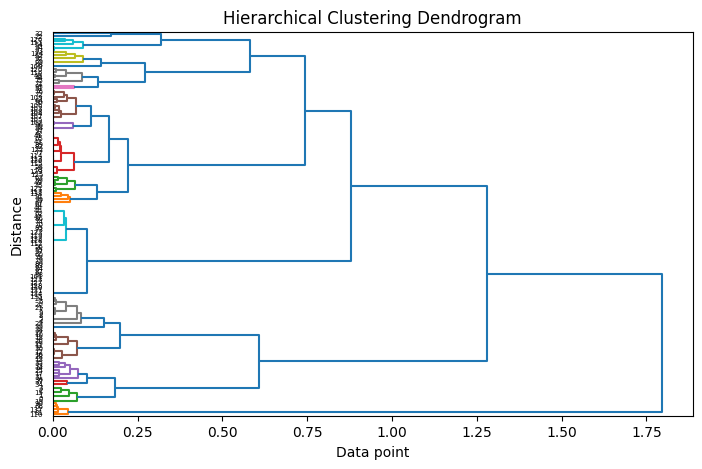

Number of Parameters: 10
Features by Cluster:
{np.int32(1): ['global_store_requests (correct_particles)',
               'inst_misc (cl_build_key_list)',
               'global_store_requests (cl_build_key_list)',
               'global_store_requests (compute_leaf)',
               'global_store_requests (predict_particles)'],
 np.int32(2): ['l2_subp0_read_tex_sector_queries (dev_approximate_gravity)',
               'l2_subp1_read_tex_sector_queries (dev_approximate_gravity)',
               'l2_subp0_read_tex_hit_sectors (dev_approximate_gravity)',
               'l2_subp1_read_tex_hit_sectors (dev_approximate_gravity)',
               'inst_per_warp (dev_approximate_gravity)',
               'local_load_transactions (dev_approximate_gravity)',
               'gld_transactions (dev_approximate_gravity)',
               'l2_read_transactions (dev_approximate_gravity)',
               'l2_tex_read_transactions (dev_approximate_gravity)',
               'l2_global_load_bytes (dev_appro

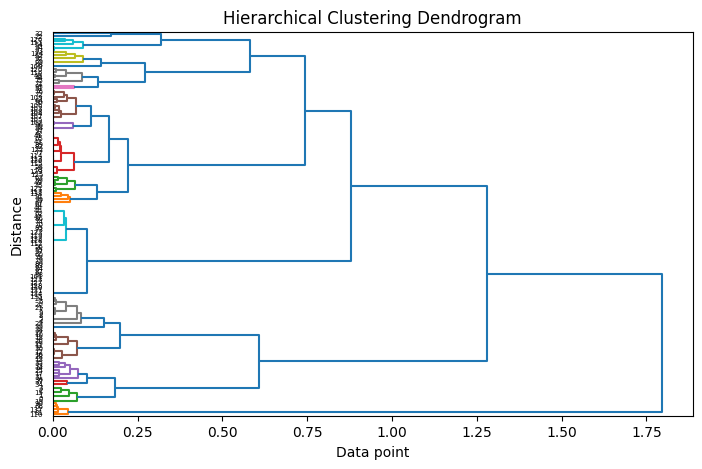

Number of Parameters: 15
Features by Cluster:
{np.int32(1): ['global_store_requests (correct_particles)',
               'inst_misc (cl_build_key_list)',
               'global_store_requests (cl_build_key_list)',
               'global_store_requests (compute_leaf)',
               'global_store_requests (predict_particles)'],
 np.int32(2): ['l2_subp0_read_tex_sector_queries (dev_approximate_gravity)',
               'l2_subp1_read_tex_sector_queries (dev_approximate_gravity)',
               'l2_subp0_read_tex_hit_sectors (dev_approximate_gravity)',
               'l2_subp1_read_tex_hit_sectors (dev_approximate_gravity)',
               'local_load_transactions (dev_approximate_gravity)',
               'l2_read_transactions (dev_approximate_gravity)'],
 np.int32(3): ['inst_per_warp (dev_approximate_gravity)',
               'gld_transactions (dev_approximate_gravity)',
               'l2_tex_read_transactions (dev_approximate_gravity)',
               'l2_global_load_bytes (dev_appr

In [24]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import pprint

# Sample DataFrame, replace this with your actual DataFrame
# df = pd.DataFrame({
#     'Metric1': [100, 200, 300, 400, 500],
#     'Metric2': [10, 20, 30, 40, 50],
#     'Metric3': [5, 10, 15, 20, 25],
#     'Metric4': [1, 1, 1, 1, 1]
# })
df = filtered_df

df_scaled = np.log1p(df)  # Use log1p to avoid issues with zero values (log(x+1))

# Step 2: Normalization (scaling between 0 and 1)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df.columns)

# Step 1: Compute the correlation matrix
SCC = df_normalized.corr(method='spearman').fillna(0).abs()  # Using absolute values for correlation strength

# # Step 1: Calculate the correlation matrix (SCC)
# SCC = df.corr(method='spearman')
print(SCC.shape)
# Step 2: Perform hierarchical clustering
dendroG = linkage(SCC, method='ward')


# Function to cut the dendrogram and return features with highest variance
def cut_dendrogram_and_variance(dendroG, num_params, df):
    # Cut the dendrogram to get clusters
    cutDendro = fcluster(dendroG, num_params, criterion='maxclust')
    
    # Create a DataFrame with cluster labels
    clusters = pd.Series(cutDendro, index=SCC.columns)
    
    # Group features by their clusters
    grouped_features = {}
    for cluster in clusters.unique():
        grouped_features[cluster] = clusters[clusters == cluster].index.tolist()
    
    # Calculate variance for each group of features
    variance_dict = {}
    for cluster, features in grouped_features.items():
        # Select features and calculate their variance
        feature_data = df[features]
        variance_value = feature_data.var().sum()  # Total variance of the group
        variance_dict[cluster] = variance_value
    
    # Plot dendrogram 
    dendrogram(dendroG, orientation="right",  color_threshold =0.1) 
    
    plt.title('Hierarchical Clustering Dendrogram') 
    plt.subplots_adjust(left=8, right=9, top=0.9, bottom=0.1)
    plt.xlabel('Data point') 
    plt.ylabel('Distance') 
    plt.show()

    
    return grouped_features, variance_dict

def select_high_variance_feature(dendroG, df, num_params):
    # Cut the dendrogram to form clusters
    cutDendro = fcluster(dendroG, num_params, criterion='maxclust')
    
    # Map each column to its cluster label
    clusters = pd.Series(cutDendro, index=SCC.columns)
    
    # For each cluster, find the feature with the maximum variance
    selected_features = []
    for cluster in clusters.unique():
        # Get the features in this cluster
        cluster_features = clusters[clusters == cluster].index.tolist()
        
        # Calculate variance for each feature in the cluster
        variances = df[cluster_features].var()
        
        # Select the feature with the highest variance
        selected_feature = variances.idxmax()
        selected_features.append(selected_feature)
    
    return selected_features

# Step 4: Define number of clusters and select features
# Step 3: Loop through the number of parameters and compute variance
for No_Param in [10,15]:  # For No. Param in [5, 10]
    selected_features = select_high_variance_feature(dendroG, df, No_Param)
    # Step 5: Display the selected features
    print("Selected features with highest variance from each cluster:")
    pprint.pprint(selected_features)
    features, variance = cut_dendrogram_and_variance(dendroG, No_Param,df_normalized)
    print(f"Number of Parameters: {No_Param}")
    print("Features by Cluster:")
    pprint.pprint(features)
    print("Variance by Cluster:", variance)
    print()  # New line for better readability


In [25]:
selected_features

['l2_read_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'l2_tex_write_transactions (dev_approximate_gravity)',
 'l2_global_load_bytes (dev_approximate_gravity)',
 'stall_constant_memory_dependency (dev_approximate_gravity)',
 'l2_local_load_bytes (dev_approximate_gravity)',
 'dram_write_bytes (dev_approximate_gravity)',
 'l2_global_load_bytes (predict_particles)',
 'thread_inst_executed (correct_particles)',
 'active_cycles (correct_particles)',
 'active_warps_pm (correct_particles)',
 'active_warps (cl_build_key_list)',
 'dram_write_bytes (correct_particles)',
 'l2_subp0_read_tex_hit_sectors (compute_leaf)',
 'inst_misc (cl_build_key_list)']

In [8]:
sim_params + gpu_params

['N',
 'theta',
 'dt',
 'I',
 'profiling',
 'Name',
 'Compute Capability',
 'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
 'Total Cores',
 'Warp Size',
 'Max Threads Per Block',
 'Max Blocks Per SM',
 'Shared Memory Per Block (KB)',
 'Shared Memory Per SM (KB)',
 'Registers Per Block',
 'Registers Per SM',
 'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
 'Memory Bus Width (bits)',
 'Memory Bandwidth (GB/s)',
 'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
 'Half Precision FLOP/s',
 'Single Precision FLOP/s',
 'Double Precision FLOP/s',
 'Concurrent Kernels',
 'Threads Per Warp',
 'Global Memory Bandwidth (GB/s)',
 'Global Memory Size (MB)',
 'L2 Cache Size',
 'Memcpy Engines']

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample DataFrame, replace with your actual dataset
df = pd.DataFrame({
    'N': [1000, 2000, 3000, 4000, 5000],
    'theta': [0.5, 0.6, 0.7, 0.8, 0.9],
    'dt': [0.01, 0.02, 0.03, 0.04, 0.05],
    'exec_time_avg': [0.12, 0.15, 0.14, 0.20, 0.18],
    # High-variance features identified from clustering
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 10, 15, 20, 25],
    'Feature3': [100, 200, 300, 400, 500]
})

# Step 1: Define core input, target, and high-variance features
input_features = ['N', 'theta', 'dt']
target = 'exec_time_avg'
high_variance_features = ['Feature1', 'Feature2', 'Feature3']  # Replace with your selected features

# Combine inputs and high-variance features for training
training_features = input_features + high_variance_features

# Step 2: Split data into training and testing sets
X = df[training_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate model using only input features for test predictions
X_test_final = X_test[input_features]  # Restrict to input features only for querying
y_pred = model.predict(X_test_final)

# Calculate mean squared error for model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Feature1
- Feature2
- Feature3


In [19]:
full

,N,theta,dt,I,exec_time_min,exec_time_max,exec_time_avg,profiling,Name,Compute Capability,...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
0,100,0.2,0.000063,2,0.001399,0.002646,0.001706,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.096272,0.103667,2.444988,0.097800,241.0,44.0,3.772248e+00,7.052382e+02,7712.0,1408.0
1,100,0.2,0.000625,2,0.001423,0.003095,0.001865,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.097004,0.101533,2.394636,0.095785,226.0,12.0,3.078302e+00,1.673725e+02,7232.0,384.0
2,100,0.2,0.006250,2,0.001414,0.002085,0.001593,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.097004,0.100569,2.371917,0.094877,241.0,40.0,4.025986e+00,6.842506e+02,7712.0,1280.0
3,100,0.2,0.062500,2,0.001411,0.001796,0.001536,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.091234,0.094812,2.236136,0.089246,226.0,31.0,3.731482e+00,5.241246e+02,7232.0,992.0
4,100,0.2,0.625000,2,0.001401,0.002373,0.001797,True,NVIDIA GeForce GTX 1060 6GB,6.1,...,0.107937,0.153401,3.617945,0.144718,223.0,0.0,3.823888e+00,0.000000e+00,7136.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,10000000,0.8,6.250000,2,0.287810,0.327290,0.296812,True,NVIDIA GeForce RTX 3060,8.6,...,0.030000,0.030000,3.160000,4.860000,17774304.0,10157816.0,2.154383e+11,1.231206e+11,568777728.0,325050112.0
1256,10000000,0.8,62.500000,2,0.258469,0.297531,0.267215,True,NVIDIA GeForce RTX 3060,8.6,...,0.030000,0.030000,3.210000,4.930000,17505412.0,10157024.0,2.124237e+11,1.232529e+11,560173184.0,325024768.0
1257,10000000,0.8,625.000000,2,0.255671,0.272829,0.263155,True,NVIDIA GeForce RTX 3060,8.6,...,0.030000,0.030000,3.160000,4.850000,17769800.0,10115316.0,2.152246e+11,1.225148e+11,568633600.0,323690112.0
1258,10000000,0.8,6250.000000,2,0.257245,0.285415,0.263679,True,NVIDIA GeForce RTX 3060,8.6,...,0.030000,0.030000,3.160000,4.860000,17771200.0,10116036.0,2.140825e+11,1.218638e+11,568678400.0,323713152.0


In [25]:
sim_params + gpu_params


['N',
 'theta',
 'dt',
 'I',
 'profiling',
 'Name',
 'Compute Capability',
 'Total Memory (MB)',
 'Multiprocessors (SMs)',
 'Max Threads Per SM',
 'Total Cores',
 'Warp Size',
 'Max Threads Per Block',
 'Max Blocks Per SM',
 'Shared Memory Per Block (KB)',
 'Shared Memory Per SM (KB)',
 'Registers Per Block',
 'Registers Per SM',
 'L1 Cache Size (KB)',
 'L2 Cache Size (KB)',
 'Memory Bus Width (bits)',
 'Memory Bandwidth (GB/s)',
 'Clock Rate (MHz)',
 'Warps Per SM',
 'Blocks Per SM',
 'Half Precision FLOP/s',
 'Single Precision FLOP/s',
 'Double Precision FLOP/s',
 'Concurrent Kernels',
 'Threads Per Warp',
 'Global Memory Bandwidth (GB/s)',
 'Global Memory Size (MB)',
 'L2 Cache Size',
 'Memcpy Engines']

In [26]:
input_features = ["N","theta","dt","Multiprocessors (SMs)","Total Cores", "L2 Cache Size (KB)"]

In [ ]:
# from sklearn.model_selection import train_test_split

# X = full[input_features + selected_features]
# y = full['exec_time_avg']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### test 1: intermediate model (Dtree->Dtree)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X = full[input_features]
y_high_variance = full[selected_features]

# Train an intermediate model for each high-variance feature
intermediate_model = DecisionTreeRegressor()  # Using Linear Regression as an example
intermediate_model.fit(X, y_high_variance)

DecisionTreeRegressor()

In [53]:
# Generate high-variance feature predictions from the intermediate model
predicted_high_variance = intermediate_model.predict(X)
predicted_high_variance_df = pd.DataFrame(predicted_high_variance, columns=selected_features)

# Combine core features with the predicted high-variance features for main model training
X_full = pd.concat([X, predicted_high_variance_df], axis=1)
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [55]:
# Predict high-variance features from the core input features in the test set
predicted_high_variance_test = intermediate_model.predict(X_test[input_features])
predicted_high_variance_test_df = pd.DataFrame(predicted_high_variance_test, columns=selected_features)

# Combine core inputs and predicted high-variance features for the final prediction
X_test_full = pd.concat([X_test[input_features].reset_index(drop=True), predicted_high_variance_test_df.reset_index(drop=True)], axis=1)

# Make final predictions
y_pred = main_model.predict(X_test_full)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


Mean Absolute Percentage Error (MAPE): 0.0933
,N,theta,dt,Multiprocessors (SMs),Total Cores,L2 Cache Size (KB),y_pred,y_test
76,1000,0.2,62.5,10,1280,1536,0.001717781,0.001844715
1026,10000,0.6,62.5,28,3584,2304,0.0023064139999999,0.00189347
43,100,0.6,0.0625,10,1280,1536,0.001526473,0.0015888449999999
666,100000,0.5,62.5,46,5888,4096,0.003845763,0.004250122
529,1000,0.5,62500.0,46,5888,4096,0.00111351,0.001078319
101,1000,0.5,0.000625,10,1280,1536,0.001666618,0.001838492
908,100,0.8,6250.0,28,3584,2304,0.001520968,0.000918839
1225,10000000,0.5,6.25,28,3584,2304,0.588365,0.5300126
777,10000000,0.2,625.0,46,5888,4096,1.4809290000000002,1.483664
453,100,0.5,0.0625,46,5888,4096,0.0010464666,0.0009952300999999
63,100,0.8,0.0625,10,1280,1536,0.001512789,0.001420139
947,1000,0.5,625.0,28,3584,2304,0.001099706,0.001327965
350,10000000,0.2,6.25e-05,10,1280,1536,10.30084,10.26651
522,1000,0.5,0.00625,46,5888,4096,0.001173091,0.001174713
907,100,0.8,625.0,28,3584,2304,0.0008981246,0.001293015
67

### Test2: Direct model (sim + gpu, no high variance features)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data for intermediate model training
X_full = full[input_features]
y_exec_time = full['exec_time_avg']

# Split data for main model training
X_train, X_test, y_train, y_test = train_test_split(X_full, y_exec_time, test_size=0.2, random_state=42)

# Train the main model with both core and high-variance features
main_model = DecisionTreeRegressor(random_state=42)
main_model.fit(X_train, y_train)

# Make final predictions
y_pred = main_model.predict(X_test)

# Display the results
results_df = pd.DataFrame({
    'N': X_test['N'],
    'theta': X_test['theta'],
    'dt': X_test['dt'],
    'Multiprocessors (SMs)': X_test['Multiprocessors (SMs)'],
    'Total Cores': X_test['Total Cores'],
    'L2 Cache Size (KB)': X_test['L2 Cache Size (KB)'],
    'y_pred': y_pred,
    'y_test': y_test
})

from sklearn.metrics import mean_absolute_percentage_error
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

print(results_df.to_csv())


Mean Absolute Percentage Error (MAPE): 0.0793
,N,theta,dt,Multiprocessors (SMs),Total Cores,L2 Cache Size (KB),y_pred,y_test
76,1000,0.2,62.5,10,1280,1536,0.001758694,0.001844715
1026,10000,0.6,62.5,28,3584,2304,0.001712678,0.00189347
43,100,0.6,0.0625,10,1280,1536,0.001560689,0.0015888449999999
666,100000,0.5,62.5,46,5888,4096,0.004581235,0.004250122
529,1000,0.5,62500.0,46,5888,4096,0.00111351,0.001078319
101,1000,0.5,0.000625,10,1280,1536,0.001726126,0.001838492
908,100,0.8,6250.0,28,3584,2304,0.001088478,0.000918839
1225,10000000,0.5,6.25,28,3584,2304,0.4729360999999999,0.5300126
777,10000000,0.2,625.0,46,5888,4096,1.52564,1.483664
453,100,0.5,0.0625,46,5888,4096,0.0009644779999999,0.0009952300999999
63,100,0.8,0.0625,10,1280,1536,0.001519251,0.001420139
947,1000,0.5,625.0,28,3584,2304,0.001046871,0.001327965
350,10000000,0.2,6.25e-05,10,1280,1536,10.30084,10.26651
522,1000,0.5,0.00625,46,5888,4096,0.001314998,0.001174713
907,100,0.8,625.0,28,3584,2304,0.001088478,0.001293015
672,1

In [42]:
print(input_features)

['N', 'theta', 'dt', 'Multiprocessors (SMs)', 'Total Cores', 'L2 Cache Size (KB)']


In [28]:
print(full[input_features+selected_features].to_string())

             N  theta            dt  Multiprocessors (SMs)  Total Cores  L2 Cache Size (KB)  l2_read_transactions (dev_approximate_gravity)  thread_inst_executed (dev_approximate_gravity)  l2_tex_write_transactions (dev_approximate_gravity)  l2_global_load_bytes (dev_approximate_gravity)  stall_constant_memory_dependency (dev_approximate_gravity)  l2_local_load_bytes (dev_approximate_gravity)  dram_write_bytes (dev_approximate_gravity)  l2_global_load_bytes (predict_particles)  thread_inst_executed (correct_particles)  active_cycles (correct_particles)  active_warps_pm (correct_particles)  active_warps (cl_build_key_list)  dram_write_bytes (correct_particles)  l2_subp0_read_tex_hit_sectors (compute_leaf)  inst_misc (cl_build_key_list)
0          100    0.2      0.000063                     10         1280                1536                                    1.715400e+04                                    8.692602e+06                                         8.343000e+03               

In [ ]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Custom transformer to add high-variance features during training only
class HighVarianceTransformer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit only uses high-variance features
        self.mean_variance = X[selected_features].var(axis=1).mean()
        return self
    
    def transform(self, X):
        # Transform applies summary statistic based on high-variance features
        X_transformed = X.copy()
        X_transformed['high_variance_summary'] = self.mean_variance
        return X_transformed[input_features + ['high_variance_summary']]

# Build a pipeline that includes this transformer
model_pipeline = Pipeline([
    ('high_variance', HighVarianceTransformer()),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train and evaluate the pipeline
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.4380


In [38]:
selected_features

['l2_read_transactions (dev_approximate_gravity)',
 'thread_inst_executed (dev_approximate_gravity)',
 'l2_tex_write_transactions (dev_approximate_gravity)',
 'l2_global_load_bytes (dev_approximate_gravity)',
 'stall_constant_memory_dependency (dev_approximate_gravity)',
 'dram_read_bytes (dev_approximate_gravity)',
 'dram_write_bytes (dev_approximate_gravity)',
 'l2_global_load_bytes (predict_particles)',
 'thread_inst_executed (correct_particles)',
 'active_cycles (correct_particles)',
 'active_warps_pm (correct_particles)',
 'active_warps (cl_build_key_list)',
 'dram_write_bytes (correct_particles)',
 'l2_subp0_read_tex_hit_sectors (compute_leaf)',
 'inst_misc (cl_build_key_list)']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Stage 1: Train initial model with extended features
model_stage1 = DecisionTreeRegressor(random_state=42)
model_stage1.fit(X_train[input_features + selected_features], y_train)

# Predict training data to capture influence of high-variance features
y_train_stage2 = model_stage1.predict(X_train[input_features + selected_features])

# Stage 2: Train final model using core features only on predictions from Stage 1
model_stage2 = DecisionTreeRegressor()  # Or use another model if needed
model_stage2.fit(X_train[input_features], y_train_stage2)

# Predict with final model using core features
y_pred = model_stage2.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.0134


In [ ]:
model_stage1 = DecisionTreeRegressor(random_state=42)
model_stage1.fit(X_train[input_features], y_train)

# Predict with final model using core features
y_pred = model_stage1.predict(X_test[input_features])
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.4f}")

Mean Squared Error on Test Data: 0.0184


In [56]:
import pandas as pd

# Define the core input columns used for predictions
input_columns = X_test[input_features].reset_index(drop=True)

# Convert y_test and y_pred to pandas Series for easy concatenation
y_test_series = pd.Series(y_test, name='y_test').reset_index(drop=True)
y_pred_series = pd.Series(y_pred, name='y_pred').reset_index(drop=True)

# Combine input columns, y_test, and y_pred into one DataFrame
results_df = pd.concat([input_columns, y_test_series, y_pred_series], axis=1)

# Display the resulting DataFrame
print(results_df.to_string())

            N  theta            dt  Multiprocessors (SMs)  Total Cores  L2 Cache Size (KB)     y_test     y_pred
0        1000    0.2     62.500000                     10         1280                1536   0.001845   0.001759
1       10000    0.6     62.500000                     28         3584                2304   0.001893   0.001713
2         100    0.6      0.062500                     10         1280                1536   0.001589   0.001561
3      100000    0.5     62.500000                     46         5888                4096   0.004250   0.004581
4        1000    0.5  62500.000000                     46         5888                4096   0.001078   0.001114
5        1000    0.5      0.000625                     10         1280                1536   0.001838   0.001726
6         100    0.8   6250.000000                     28         3584                2304   0.000919   0.001088
7    10000000    0.5      6.250000                     28         3584                2304   0.5

In [132]:
# base_directory = "./Data_collect"
# current_run_directory = select_run_folder(base_directory,6)
# res2 = load_profiling_parameters_ncu(current_run_directory)
# # list(res.columns.values)
# print(res2.to_string())

TypeError: load_profiling_parameters_ncu() missing 3 required positional arguments: 'N', 'theta', and 'dt'

In [60]:

# print(ncu_2_nvprof(res2).to_string())

                            Device  Context  Stream                   Kernel Correlation_ID tex0_cache_sector_queries tex1_cache_sector_queries tex0_cache_sector_misses tex1_cache_sector_misses  fb_subp0_read_sectors  fb_subp1_read_sectors  fb_subp0_write_sectors  fb_subp1_write_sectors  l2_subp0_write_sector_misses  l2_subp1_write_sector_misses  l2_subp0_read_sector_misses  l2_subp1_read_sector_misses  l2_subp0_read_tex_sector_queries  l2_subp1_read_tex_sector_queries  l2_subp0_write_tex_sector_queries  l2_subp1_write_tex_sector_queries  l2_subp0_read_tex_hit_sectors  l2_subp1_read_tex_hit_sectors  l2_subp0_write_tex_hit_sectors  l2_subp1_write_tex_hit_sectors  l2_subp0_total_read_sector_queries  l2_subp1_total_read_sector_queries  l2_subp0_total_write_sector_queries  l2_subp1_total_write_sector_queries  l2_subp0_read_sysmem_sector_queries  l2_subp1_read_sysmem_sector_queries  l2_subp0_write_sysmem_sector_queries  l2_subp1_write_sysmem_sector_queries  elapsed_cycles_sm gld_inst_8bit g

In [131]:
profile_flatten(ncu_2_nvprof(res2))
profile_flatten(res)

r3 = pd.concat([res,ncu_2_nvprof(res2)])

# print(r3.to_string())

# branch_efficiency ?
# tex_cache_hit_rate ?
# sysmem_read_throughput?
# sysmem_write_throughput?
# local_load_throughput?  local_store_throughput? shared_store_throughput?
# gld_efficiency?
# gst_efficiency?
# flop_count_dp?  flop_count_dp_add ? flop_count_dp_fma ? flop_count_dp_mul? 
# inst_fp_64?  inst_bit_convert?  inst_control?  inst_compute_ld_st ?    inst_misc?
# sm_efficiency?
# dram_read_bytes?

filter_out = [
    "Device",
    "Context",
    "Stream",
    "Correlation_ID",
    "tex0_cache_sector_queries",
    "tex1_cache_sector_queries",
    "tex0_cache_sector_misses",
    "tex1_cache_sector_misses",
    "l2_subp0_write_sector_misses",
    "l2_subp1_write_sector_misses",
    "l2_subp0_read_sysmem_sector_queries",
    "l2_subp1_read_sysmem_sector_queries",
    "gld_inst_8bit",
    "gld_inst_16bit",
    "gld_inst_32bit",
    "gld_inst_64bit",
    "gld_inst_128bit",
    "gst_inst_8bit",
    "gst_inst_16bit",
    "gst_inst_32bit",
    "gst_inst_64bit",
    "gst_inst_128bit",
    "prof_trigger_00",
    "prof_trigger_01",
    "prof_trigger_02",
    "prof_trigger_03",
    "prof_trigger_04",
    "prof_trigger_05",
    "prof_trigger_06",
    "prof_trigger_07",
    "inst_issued2",
    "generic_load",
    "generic_store",
    "inst_executed_in_trap",
    "active_cycles_in_trap",
    "inst_executed_shared_atom_cas",
    "shared_atom",
    "global_atom_cas",
    "gred_count",
    "divergent_branch",
    "branch",
    "shared_ld_bank_conflict",
    "shared_st_bank_conflict",
    "inst_replay_overhead",
    "shared_load_transactions_per_request",
    "shared_store_transactions_per_request",
    "local_hit_rate",
    "gld_requested_throughput",
    "gst_requested_throughput",
    "local_memory_overhead",
    "tex_cache_throughput",
    "sysmem_utilization",
    "stall_sync",
    "stall_texture",
    "shared_efficiency",
    "cf_issued",
    "ldst_issued",
    "ldst_executed",
    "atomic_transactions_per_request",
    "flop_count_hp",
    "flop_count_hp_add",
    "flop_count_hp_mul",
    "flop_count_hp_fma",
    "inst_fp_16",
    "sysmem_read_utilization",
    "sysmem_write_utilization",
    "pcie_total_data_transmitted",
    "pcie_total_data_received",
    "inst_executed_surface_loads",
    "inst_executed_surface_stores",
    "inst_executed_global_atomics",
    "inst_executed_global_reductions",
    "inst_executed_surface_atomics",
    "inst_executed_surface_reductions",
    "inst_executed_shared_atomics",
    "inst_executed_tex_ops",
    "l2_surface_load_bytes",
    "l2_global_reduction_bytes",
    "l2_surface_store_bytes",
    "l2_surface_reduction_bytes",
    "l2_surface_atomic_store_bytes",
    "surface_load_requests",
    "surface_store_requests",
    "global_reduction_requests",
    "surface_atomic_requests",
    "surface_reduction_requests",
    "sysmem_read_bytes",
    "sysmem_write_bytes",
    "texture_load_requests",
    "unique_warps_launched",
    "tex_utilization",
    "l2_utilization",
    "shared_utilization",
    "ldst_fu_utilization",
    "cf_fu_utilization",
    "special_fu_utilization",
    "tex_fu_utilization",
    "single_precision_fu_utilization",
    "double_precision_fu_utilization",
    "dram_utilization",
    "half_precision_fu_utilization",
    "ecc_transactions",
    "ecc_throughput"
    ]
r4 = r3.drop(filter_out,axis=1)

print(r4.to_string())

#todo append to run parsing and filter data
#convert overflow to max value possible

                    Kernel  fb_subp0_read_sectors  fb_subp1_read_sectors  fb_subp0_write_sectors  fb_subp1_write_sectors  l2_subp0_read_sector_misses  l2_subp1_read_sector_misses  l2_subp0_read_tex_sector_queries  l2_subp1_read_tex_sector_queries  l2_subp0_write_tex_sector_queries  l2_subp1_write_tex_sector_queries  l2_subp0_read_tex_hit_sectors  l2_subp1_read_tex_hit_sectors  l2_subp0_write_tex_hit_sectors  l2_subp1_write_tex_hit_sectors  l2_subp0_total_read_sector_queries  l2_subp1_total_read_sector_queries  l2_subp0_total_write_sector_queries  l2_subp1_total_write_sector_queries  l2_subp0_write_sysmem_sector_queries  l2_subp1_write_sysmem_sector_queries elapsed_cycles_sm  warps_launched  inst_issued0  inst_issued1  inst_executed  thread_inst_executed  not_predicated_off_thread_inst_executed  active_cycles  active_warps   global_load  global_store   local_store    local_load  shared_load  shared_store  atom_count  shared_ld_transactions  shared_st_transactions active_cycles_pm  activ

In [68]:
profile_flatten(r4)

,fb_subp0_read_sectors (dev_approximate_gravity),fb_subp1_read_sectors (dev_approximate_gravity),fb_subp0_write_sectors (dev_approximate_gravity),fb_subp1_write_sectors (dev_approximate_gravity),l2_subp0_read_sector_misses (dev_approximate_gravity),l2_subp1_read_sector_misses (dev_approximate_gravity),l2_subp0_read_tex_sector_queries (dev_approximate_gravity),l2_subp1_read_tex_sector_queries (dev_approximate_gravity),l2_subp0_write_tex_sector_queries (dev_approximate_gravity),l2_subp1_write_tex_sector_queries (dev_approximate_gravity),...,ipc (predict_particles),issued_ipc (predict_particles),issue_slot_utilization (predict_particles),eligible_warps_per_cycle (predict_particles),dram_read_transactions (predict_particles),dram_write_transactions (predict_particles),dram_read_throughput (predict_particles),dram_write_throughput (predict_particles),dram_read_bytes (predict_particles),dram_write_bytes (predict_particles)
0,1.793022e+10,1.793022e+10,6.810167e+09,6.810167e+09,1.795565e+10,1.795565e+10,2.889829e+10,2.889829e+10,1.616621e+10,1.616621e+10,...,0.02,0.02,2.15,5.34,17506036.0,10032244.0,2.581250e+11,1.479246e+11,560193152.0,321031808.0
